In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio

In [93]:
from scipy.ndimage import rotate

In [12]:
import matplotlib.pyplot as plt

In [9]:
from PIL import Image as im

In [77]:
COLOR_LETTER_TO_INDEX = {'b':2, 'g':1, 'r':0}

In [2]:
def read_img(name):
    # read in the image
    im = skio.imread(name)

    # convert to double (might want to do this later on to save memory)    
    im = sk.img_as_float(im)

    # compute the height of each part (just 1/3 of total)
    height = np.floor(im.shape[0] / 3.0).astype(np.int)
    
    im_channels = {}
    # separate color channels
    
    im_channels['b'] = im[:height]
    im_channels['g'] = im[height: 2*height]
    im_channels['r'] = im[2*height: 3*height]
    
    return im_channels


In [70]:
def display_dictionary_of_images(dic, prefix, horiz = False, w = 6, h = 5):
    %matplotlib inline
    
    if horiz:
    
        fig = plt.figure(figsize=(w * len(dic), h))
        try:
            subplots = list(fig.subplots(1, len(dic)))
        except:
            subplots = [fig.subplots(1, len(dic))]
    else:
        fig = plt.figure(figsize=(w, h * len(dic)))
        try:
            subplots = list(fig.subplots(len(dic), 1))
        except:
            subplots = [fig.subplots(len(dic), 1)]
    
    keylist = list(dic.keys())
    
    for i in range(len(dic)):
        key = keylist[i]      
        pixels = dic[key]

        #Display the image
        ax = subplots[i]
        ax.set_title(prefix + ' ' + key)
        if len(pixels.shape) == 2:
            # grayscale (scalars)
            ax.imshow(pixels,cmap='Greys_r', vmin=0, vmax=1)
        if len(pixels.shape) == 3:
            # rgb
            ax.imshow(pixels)
            


In [72]:
def convert_to_color(x, index):
    blank = np.zeros(x.shape)
    res = np.stack(([blank]*index) + [x] + ([blank]* (2 - index)), axis = 2)
    return res


In [7]:
cathedral_pre = read_img('data/cathedral.jpg')

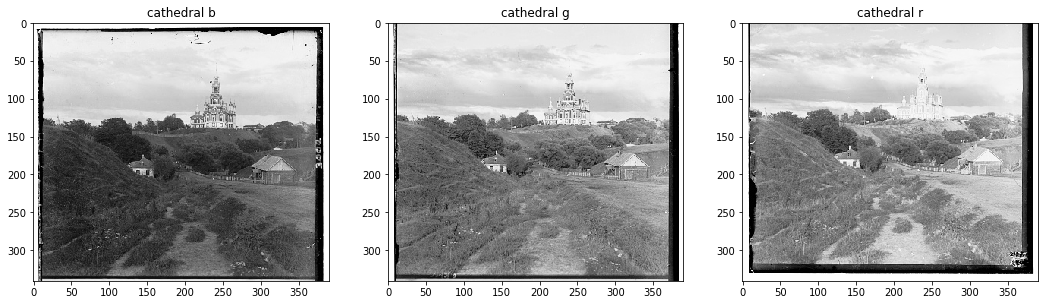

In [76]:
display_dictionary_of_images(cathedral_pre, 'cathedral', True)

In [78]:
def convert_to_three_colors(dic):
    keys = dic.keys()
    vals = [convert_to_color(dic[key], COLOR_LETTER_TO_INDEX[key]) for key in keys]
    return dict(zip(keys, vals))

In [79]:
cathedral_tricolore = convert_to_three_colors(cathedral_pre)

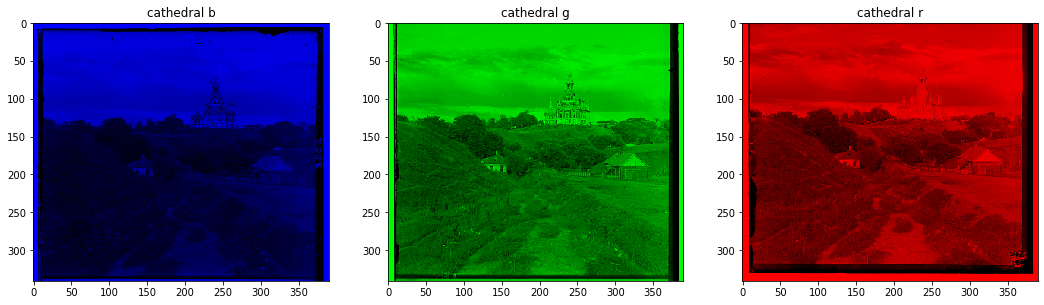

In [81]:
display_dictionary_of_images(cathedral_tricolore, 'cathedral', True)

In [100]:
"""
dic schema:
{
    'b': array for b
    'g': array for g
    'r': array for r
}
offset schema:
    [
    [green x offset, green y offset, green angle],
    [red x offset, red y offset, red angle]
    ]

"""
def create_offset(dic, offset):
    res = {'b': dic['b']}
    
    new_g = dic['g']
    # roll green x axis
    new_g = np.roll(new_g, offset[0][0], axis=1)
    # roll green y axis
    new_g = np.roll(new_g, offset[0][1], axis=0)
    # rotate green
    new_g = rotate(new_g, offset[0][2], reshape = False)
    # save green
    res['g'] = new_g
    
    new_r = dic['r']
    # roll red x axis
    new_r = np.roll(new_r, offset[1][0], axis=1)
    # roll red y axis
    new_r = np.roll(new_r, offset[1][1], axis=0)
    # rotate red
    new_r = rotate(new_r, offset[1][2], reshape = False)
    # save red
    res['r'] = new_r
    
    return res
    

In [92]:
stack_dict = lambda dic: np.sum(list(dic.values()), axis = 0)

In [ ]:
def simple_loss(blue, other):
    def ncc(a,b):
        a = a.flatten()
        b = b.flatten()
        a = (a - np.mean(a)) / (np.std(a) * len(a))
        b = (b - np.mean(b)) / (np.std(b))
        return np.correlate(a, b, 'full')
    xmin, xmax = int(blue.shape[1]*0.2), int(blue.shape[1]*0.8)
    ymin, ymax = int(blue.shape[0]*0.2), int(blue.shape[0]*0.8)
    blue_compare_sample = blue[ymin:ymax, xmin:xmax]
    other_compare_sample = other[ymin:ymax, xmin:xmax]
    
    return ncc(blue_compare_sample, other_compare_sample)



In [102]:
cathedral_tricolore['b']

390

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


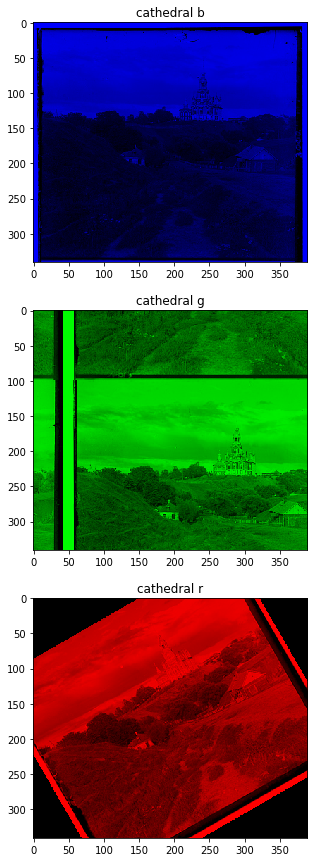

In [99]:
display_dictionary_of_images(create_offset(cathedral_tricolore, [[50, 100, 0],[0,0,30]]), 'cathedral')

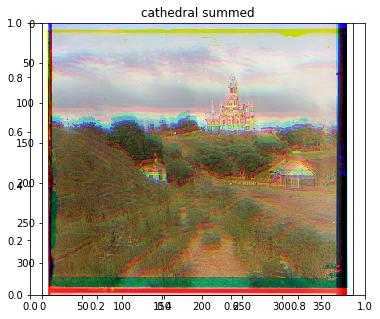

In [90]:
display_dictionary_of_images({'summed': stacked}, 'cathedral', True)

In [ ]:
# name of the input file
imname = 'cathedral.jpg'

# read in the image
im = skio.imread(imname)

# convert to double (might want to do this later on to save memory)    
im = sk.img_as_float(im)
    
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(np.int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

# align the images
# functions that might be useful for aligning the images include:
# np.roll, np.sum, sk.transform.rescale (for multiscale)

### ag = align(g, b)
### ar = align(r, b)
# create a color image
im_out = np.dstack([ar, ag, b])

# save the image
fname = '/out_path/out_fname.jpg'
skio.imsave(fname, im_out)

# display the image
skio.imshow(im_out)
skio.show()